# Sobre o notebook

Aproveite esse espaço para as atividades do curso de **IA aplicada a Data Science: utilizando IA na construção de visualização de dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Este notebook foi construído com espaços para adicionar o prompt que será utilizado para criar o código pelo ChatGPT e as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.


Logo abaixo, temos as url's onde estão localizadas as bases utilizadas no projeto juntamente com a url com dados que utilizaremos também no desafio

In [1]:
url_clientes = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_clientes.csv"
url_vendas = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_vendas.csv"
url_zoop_pay = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/cadastro_zoop_pay.csv"

## Aula 01 - Conhecendo os dados

### Mão na Massa - Zoop Pay

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Vamos atuar como analista de dados de um e-commerce. Recebemos três bases de dados com os dados dos clientes e vendas em 2023 e quais clientes estão pré-cadastrados na Zoop Pay, respectivamente.

Vamos iniciar unindo as duas primeiras bases do nosso projeto ("vendas" e "clientes") em um DataFrame chamado "df" utilizando como chave a coluna "ID_compra". Além disso, vamos organizar as colunas na seguinte sequência:

["ID_compra", "data", "horario", "categoria", "preco_unitario", "quantidade", "frete", "metodo_pagamento", "ID_cliente", "idade", "sexo_biologico", "cidade", "uf", "regiao", "cashback", "avaliacao_compra" ]

Construa um código para executar esta etapa usando o Python e a biblioteca Pandas.


In [2]:
import pandas as pd

# Exemplo de como carregar os DataFrames, caso necessário:
vendas = pd.read_csv(url_vendas)
clientes = pd.read_csv(url_clientes)

# Unindo as bases "vendas" e "clientes" usando a coluna "ID_compra" como chave
df = pd.merge(vendas, clientes, on="ID_compra")

# Organizando as colunas na sequência especificada
colunas_ordenadas = ["ID_compra", "data", "horario", "categoria", "preco_unitario", "quantidade", "frete", "metodo_pagamento", "ID_cliente", "idade", "sexo_biologico", "cidade", "uf", "regiao", "cashback", "avaliacao_compra" ]

df = df[colunas_ordenadas]

# Exibindo as primeiras linhas do DataFrame resultante para verificação
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9


> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Agora, vamos unir o "df" com a base "zoop_pay", lida a partir da url "url_zoop_pay", gerando um novo "df". Para união das bases, utilizaremos a coluna "ID_cliente". Além disso, vamos ajustar a coluna "data" para o formato datetime, em que seu formato na base de dados está como "YYYY-MM-DD".

In [3]:
# Substitua url_zoop_pay pela URL real fornecida para a base zoop_pay
zoop_pay = pd.read_csv(url_zoop_pay)

# Unindo o DataFrame df com a base zoop_pay utilizando a coluna "ID_cliente"
df = pd.merge(df, zoop_pay, on="ID_cliente")

# Ajustando a coluna "data" para o formato datetime
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

# Exibindo as primeiras linhas do DataFrame resultante para verificação
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra,zoop_pay
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10,Não
1,2467,2023-08-02,17:10,Alimentos e bebidas,13.9,1,0.97,PIX,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,8,Não
2,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8,Sim
3,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7,Não
4,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9,Sim


## Aula 02 - Visualizando os dados

### Mão na Massa - Gerando visuais em relação a localidade

#### Desafio 1:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Temos um DataFrame chamado "df" e queremos construir um visual de gráfico de colunas que apresente o faturamento por região da Zoop.

Em "df", temos as colunas:
* regiao: regiao do(a) cliente
* preco_unitario: preço de uma unidade do produto
* quantidade: quantidade vendida do produto
* frete: frete a ser pago no total da compra.

Desejamos criar uma visualização que apresente o faturamento de cada região, em que o faturamento é dado pelo produto entre o preço unitário e a quantidade somadas ao frete.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

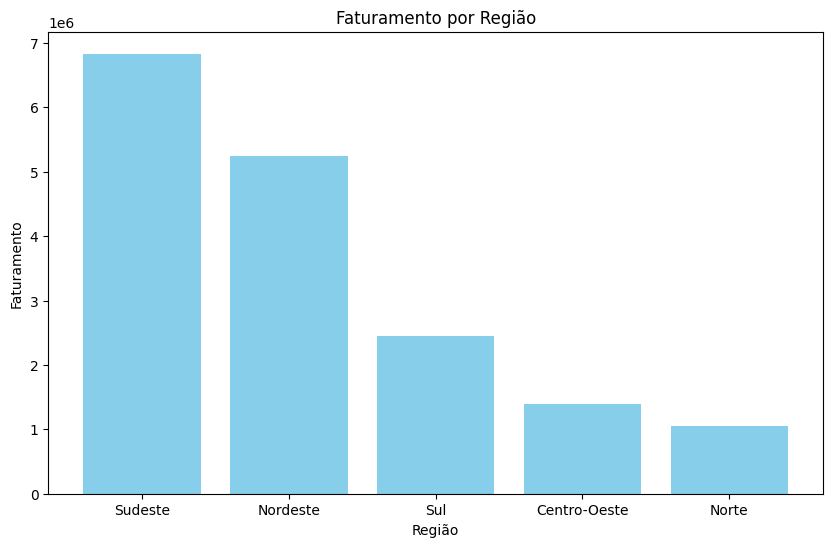

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df seja o seu DataFrame
# Calcula o faturamento para cada transação
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

# Agrupa os dados por região e soma o faturamento
faturamento_por_regiao = df.groupby('regiao')['faturamento'].sum().reset_index()

# Ordena o resultado para melhor visualização
faturamento_por_regiao = faturamento_por_regiao.sort_values(by='faturamento', ascending=False)

# Criação do gráfico de colunas
plt.figure(figsize=(10, 6))  # Ajusta o tamanho do gráfico
plt.bar(faturamento_por_regiao['regiao'], faturamento_por_regiao['faturamento'], color='skyblue')  # Plota o gráfico de barras
plt.title('Faturamento por Região')  # Adiciona título ao gráfico
plt.xlabel('Região')  # Adiciona rótulo ao eixo X
plt.ylabel('Faturamento')  # Adiciona rótulo ao eixo Y
plt.show()  # Exibe o gráfico

#### Desafio 2:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Temos um DataFrame chamado "df" e queremos construir um visual de colunas empilhadas que apresente a quantidade de pessoas por sexo biológico em relação aos estados de "São Paulo" e "Rio de Janeiro".

Em "df", temos as colunas:
* uf: unidade federativa (estado) do(a) cliente. Vamos utilizar apenas os estados de "São Paulo" e "Rio de Janeiro"
* sexo_biologico: sexo biológico do(a) cliente

Desejamos criar uma visualização que apresente a quantidade de pessoas agrupadas por sexo biológico nos estados que definimos.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

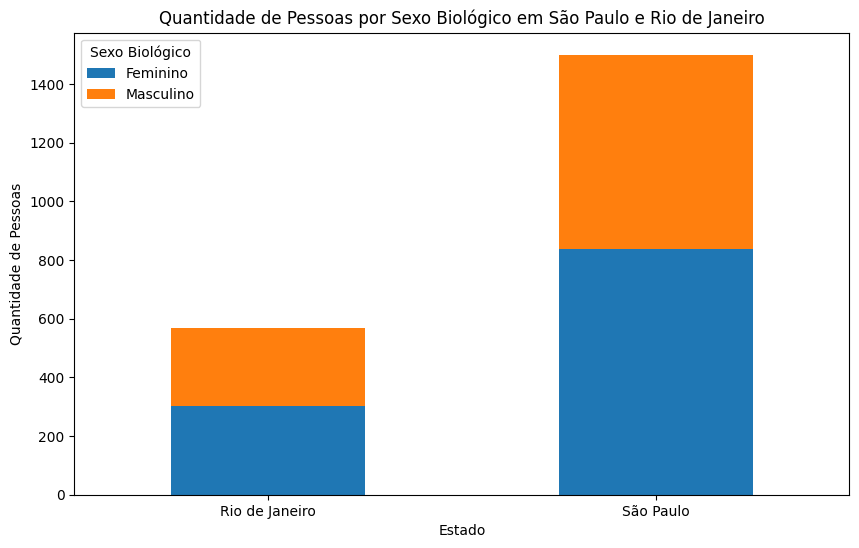

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar o DataFrame para incluir apenas os estados de "São Paulo" e "Rio de Janeiro"
df_filtrado = df[df['uf'].isin(['São Paulo', 'Rio de Janeiro'])]

# Contar a quantidade de pessoas por sexo biológico e estado
contagem_por_sexo_e_estado = df_filtrado.groupby(['uf', 'sexo_biologico']).size().unstack(fill_value=0)

# Criar o gráfico de colunas empilhadas
contagem_por_sexo_e_estado.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Pessoas por Sexo Biológico em São Paulo e Rio de Janeiro')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Pessoas')
plt.xticks(rotation=0)  # Mantém os rótulos dos estados na horizontal para melhor legibilidade

# Mostrar a legenda e o gráfico
plt.legend(title='Sexo Biológico')
plt.show()

## Aula 03 - Gerando mais visuais

### Mão na Massa - Perfil dos clientes

#### Desafio 1:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

#### Desafio 2:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

## Aula 04 - Técnicas de storytelling

### Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua própria.

In [8]:
# Adicionando as cores como variáveis do projeto
VERMELHO_1,	VERMELHO_2,	VERMELHO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BRANCO,	CINZA_1, CINZA_2, CINZA_3, CINZA_4,	CINZA_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

### Mão na Massa - Refinando os visuais escolhidos

#### Desafio 1:

##### Gráfico sem refinamento

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!


#### Desafio 2:

##### Gráfico sem refinamento

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!